![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Submitted by: Mohammad Wasiq

## Email: `gl0427@myamu.ac.in`

# Placement Machine Learning Assignment 7

**Q7.** Imagine you have a dataset where you need to predict the Genres of Music
using an Unsupervised algorithm and you need to find the accuracy of the model,
built-in docker, and use some library to display that in frontend

Dataset :- https://www.kaggle.com/datasets/insiyeah/musicfeatures

In [2]:
## Required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Loading the Dataset
data_1 = pd.read_csv('data.csv')
data_2 = pd.read_csv('data_2genre.csv')

data = pd.concat([data_1, data_2])

In [4]:
## Checking top 5 row of Dataset
data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


#### Here is a list of the genres in our dataframe, along with their counts:

In [5]:
data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: label, dtype: int64

### It looks like there are some weird numerical values. By looking at the data I see that "1" corresponds to "pop" and the "2" corresponds to "classical". Let's change those.


In [6]:
data['label'] = data['label'].replace(to_replace={1: 'pop', 2: 'classical'})

#### Now we can see the true value counts

In [7]:
data['label'].value_counts()

classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: label, dtype: int64

### Next, I'll do some exploratory data analysis to see what kind of relationships we have between our features.

## Tempo Distribution

#### Here we can see the differences in tempo distribution between some different genres.

#### Most have fairly normal distributions with peaks around 100 BPM.

#### Disco is distinctly different, with a peak closer to 150 BPM.

#### Classical and Jazz are the most diverse, having less prominent peaks and a wider spread of tempos.¶

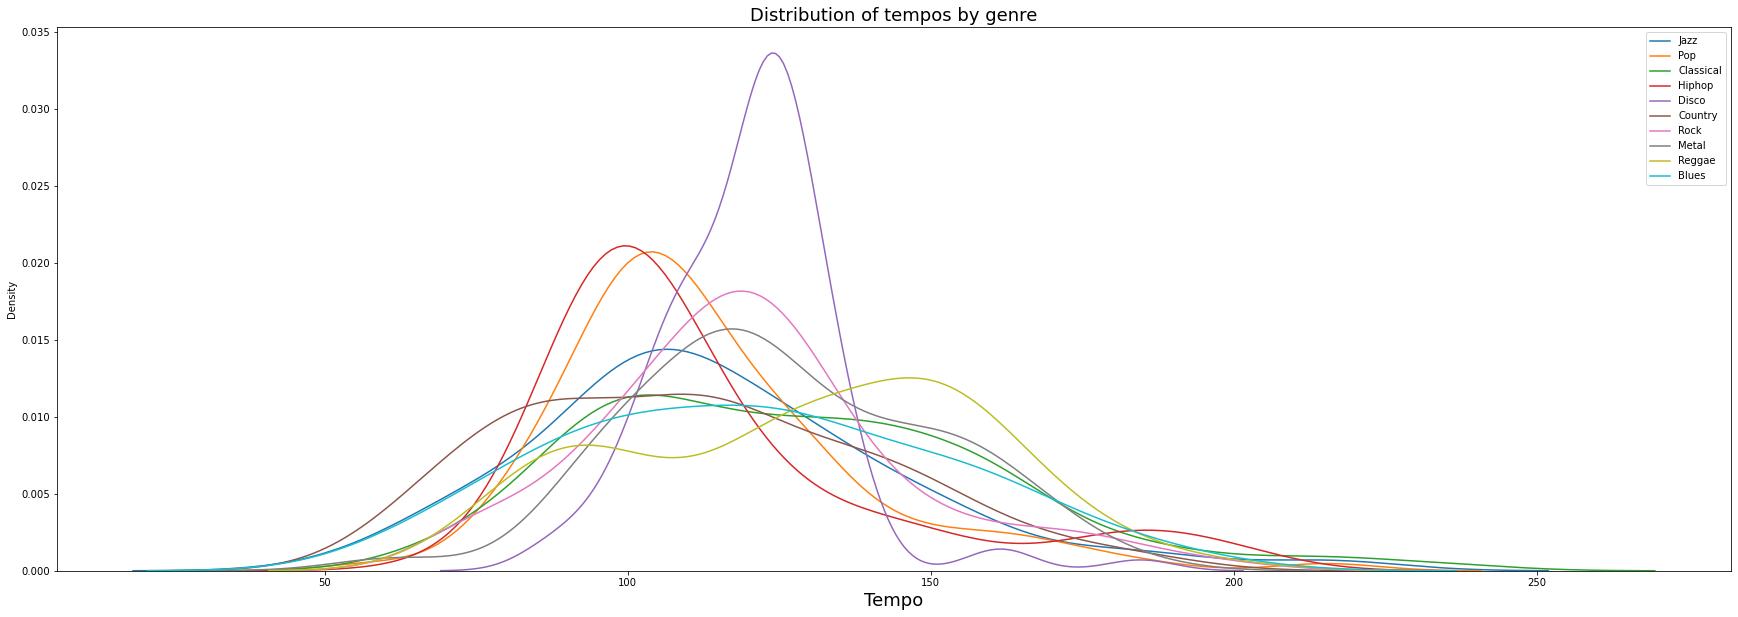

In [8]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'tempo'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of tempos by genre", fontsize = 18)

plt.xlabel("Tempo", fontsize = 18)

plt.legend()

## Tempo Mean

#### However, if we look at the average tempo of each we can see that they are all very similar

Text(0, 0.5, 'Mean Tempo')

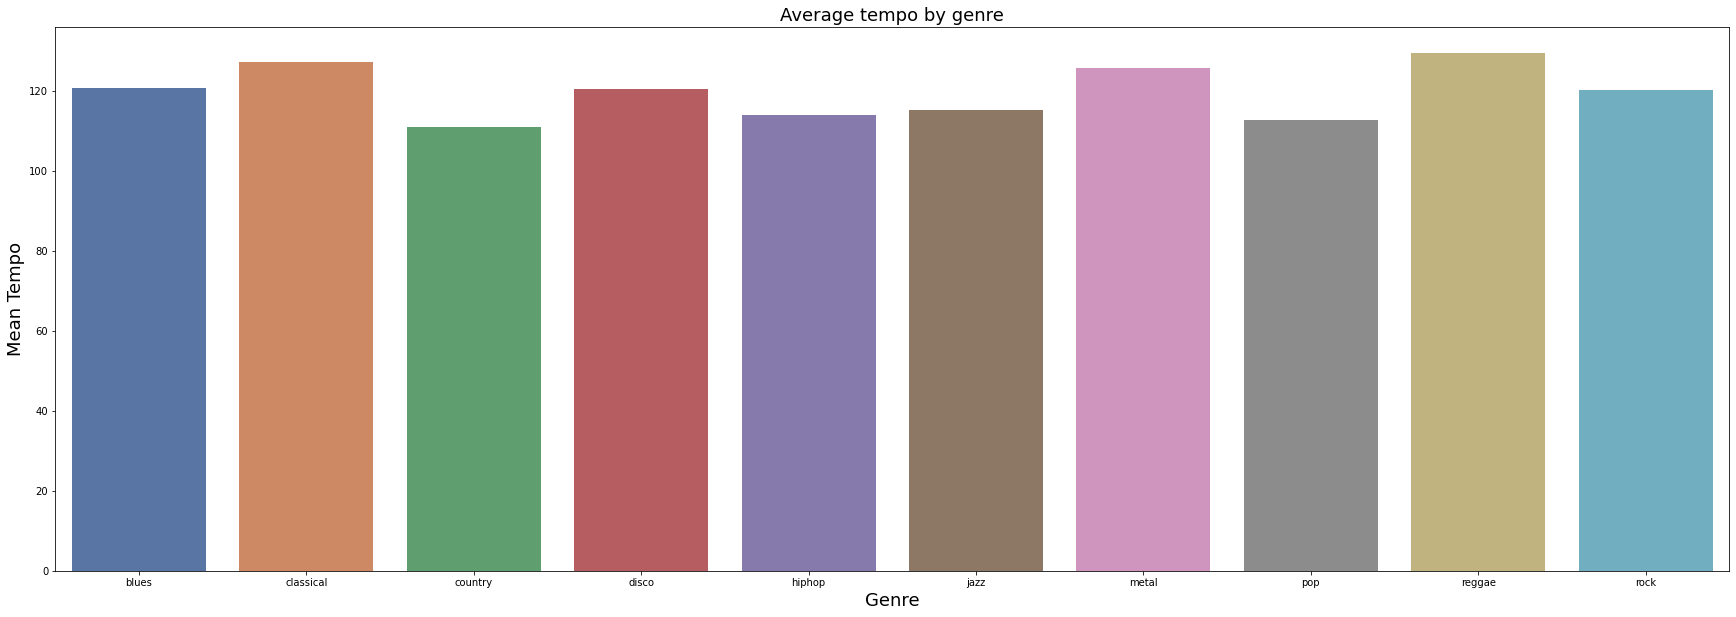

In [9]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

tempos = [ data[data['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, palette="deep")

plt.title("Average tempo by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18)

## Now I am going to look at some of the less intuitive features in the dataset.


### These features are more technical. I had to do some research to understand their meanings and implications, so I will explain them below.

## 1. Spectral Centroid

Spectral centroid is the average of frequencies weighted by amplitude, so a high spectral centroid implies that higher frequencies have higher amplitudes, or are more prominent, in this sample.

## Spectral Centroid Distribution

Songs in the classical, jazz, and country genres seem to trend toward lower spectral centroids, while pop, disco, hiphop, and metal songs tend to have higher centroids. It's possible that high spectral centroids could be correlated with catchy songs that grab your attention with high frequencies, while low spectral centroids correlate with low-toned, more relaxed music that is more common in classical, jazz, and country.


The classical and metal genres both have fairly low variance, implying that they are less diverse in terms of spectral centroids.



The distributions of classical and metal have very little overlap. We could discern between these two genres fairly accurately even if we only used this feature.

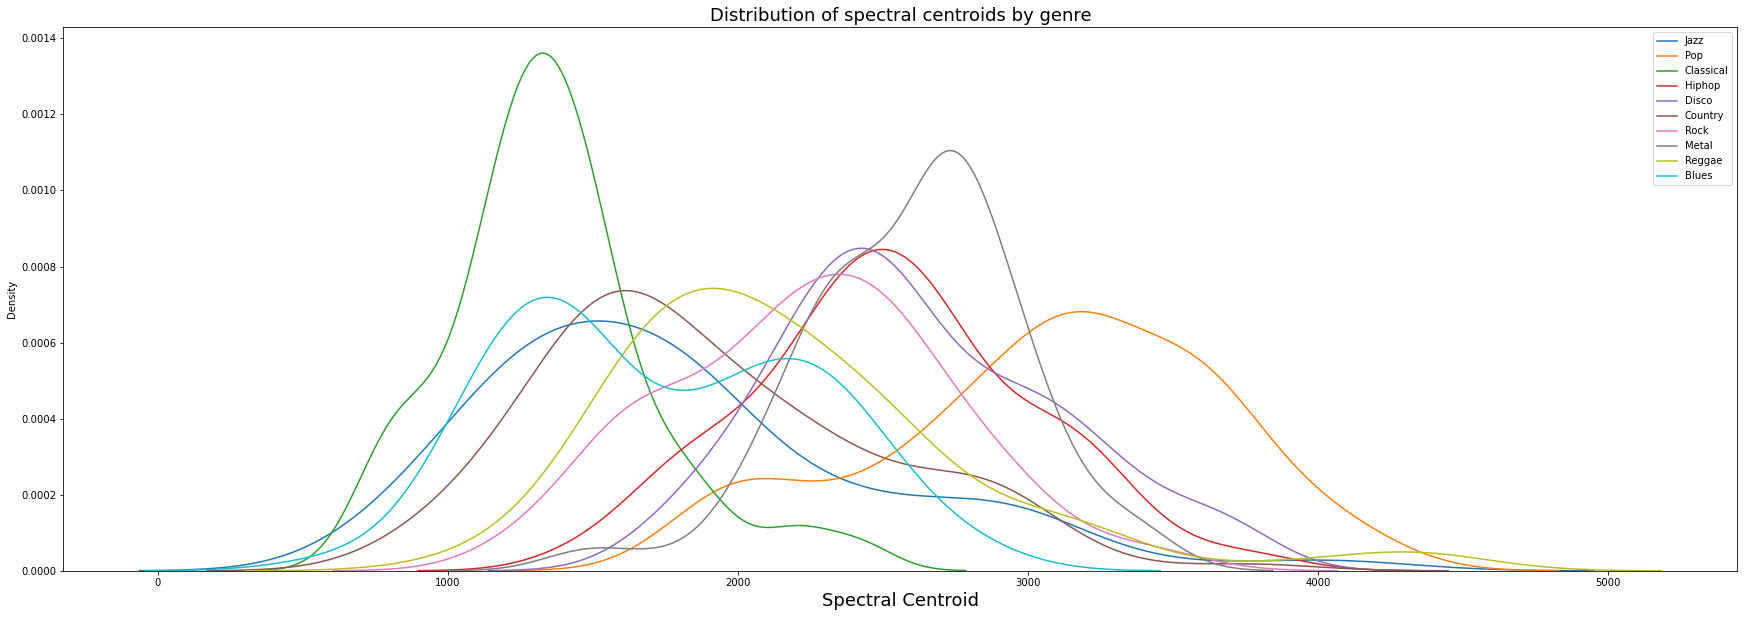

In [10]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'spectral_centroid'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'spectral_centroid'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'spectral_centroid'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'spectral_centroid'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'spectral_centroid'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'spectral_centroid'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'spectral_centroid'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'spectral_centroid'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'spectral_centroid'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'spectral_centroid'], label="Blues")

plt.title("Distribution of spectral centroids by genre", fontsize = 18)

plt.xlabel("Spectral Centroid", fontsize = 18)

plt.legend()

## Spectral Centroid Mean

As can be seen below, there is much more variance in the means of the spectral centroids than there was for tempo.

Text(0, 0.5, 'Mean Spectral Centroid')

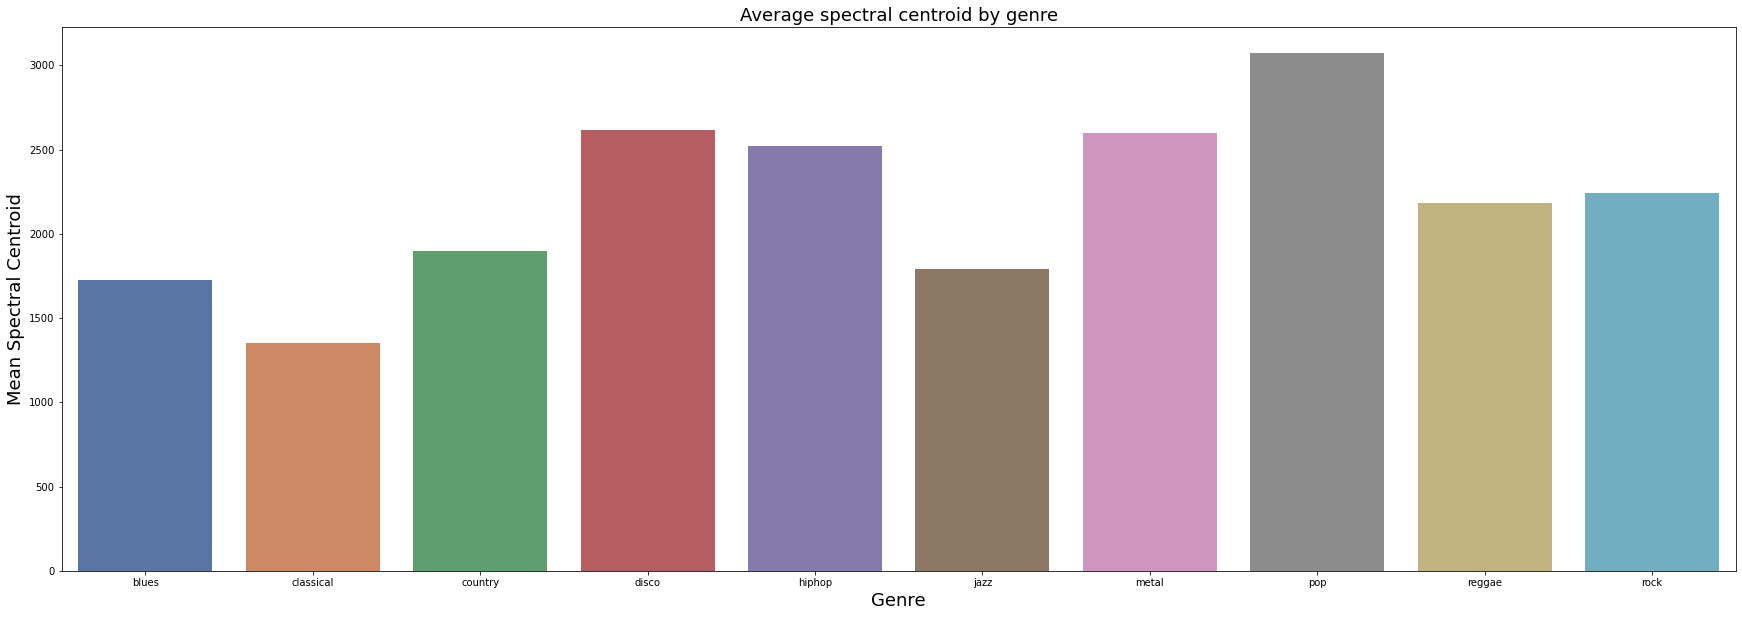

In [11]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

spectral_centroids = [ data[data['label']==x].spectral_centroid.mean() for x in genres ]

sns.barplot(x=genres, y=spectral_centroids, palette="deep")

plt.title("Average spectral centroid by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Centroid', fontsize = 18)

## 2. Spectral Bandwidth

Spectral bandwidth is the width of the frequency band for which the frequencies are at least half of the maximum amplitude. Basically, it shows us how wide the range of prominent frequencies is.

### Spectral Bandwidth Distribution

* Interestingly, there are three very distinct peaks in this graph: classical, metal, and pop. Their distributions have relatively low variance, and they have little overlap with each other, meaning that this feature will be useful in distinguishing them.


* Most classical songs have a smaller spectral bandwidth. This could be due to many classical songs being played by a single instrument, such as piano, limiting the tonal range.


* Pop songs tend to have higher bandwidths. This may be because most pop songs include multiple instruments and vocal parts.

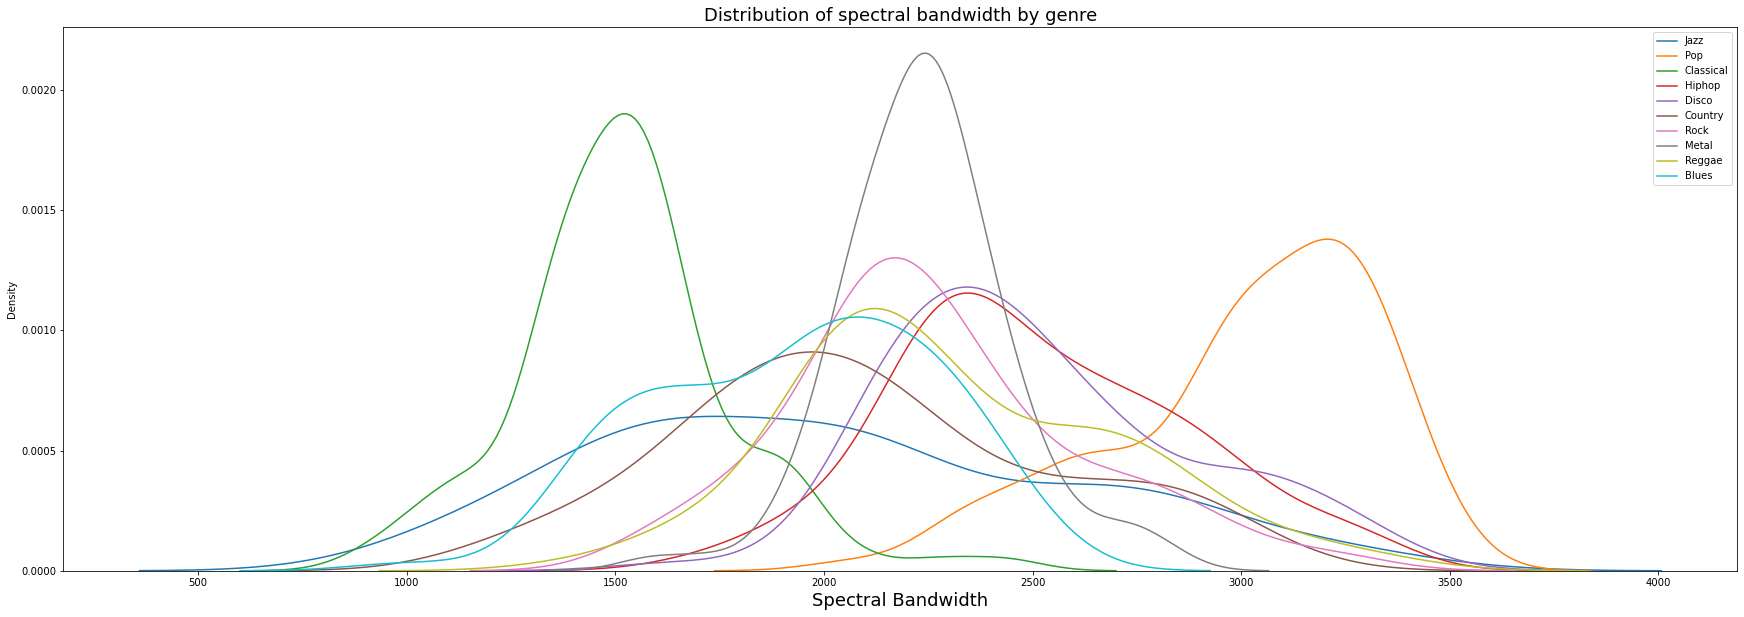

In [12]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'spectral_bandwidth'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'spectral_bandwidth'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'spectral_bandwidth'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'spectral_bandwidth'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'spectral_bandwidth'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'spectral_bandwidth'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'spectral_bandwidth'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'spectral_bandwidth'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'spectral_bandwidth'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'spectral_bandwidth'], label="Blues")

plt.title("Distribution of spectral bandwidth by genre", fontsize = 18)

plt.xlabel("Spectral Bandwidth", fontsize = 18)

plt.legend()


## Spectral Bandwidth Mean

The spectral bandwidth means look very similar to the spectral centroid means. This may indicate some kind of correlation.

Text(0, 0.5, 'Mean Spectral Bandwidth')

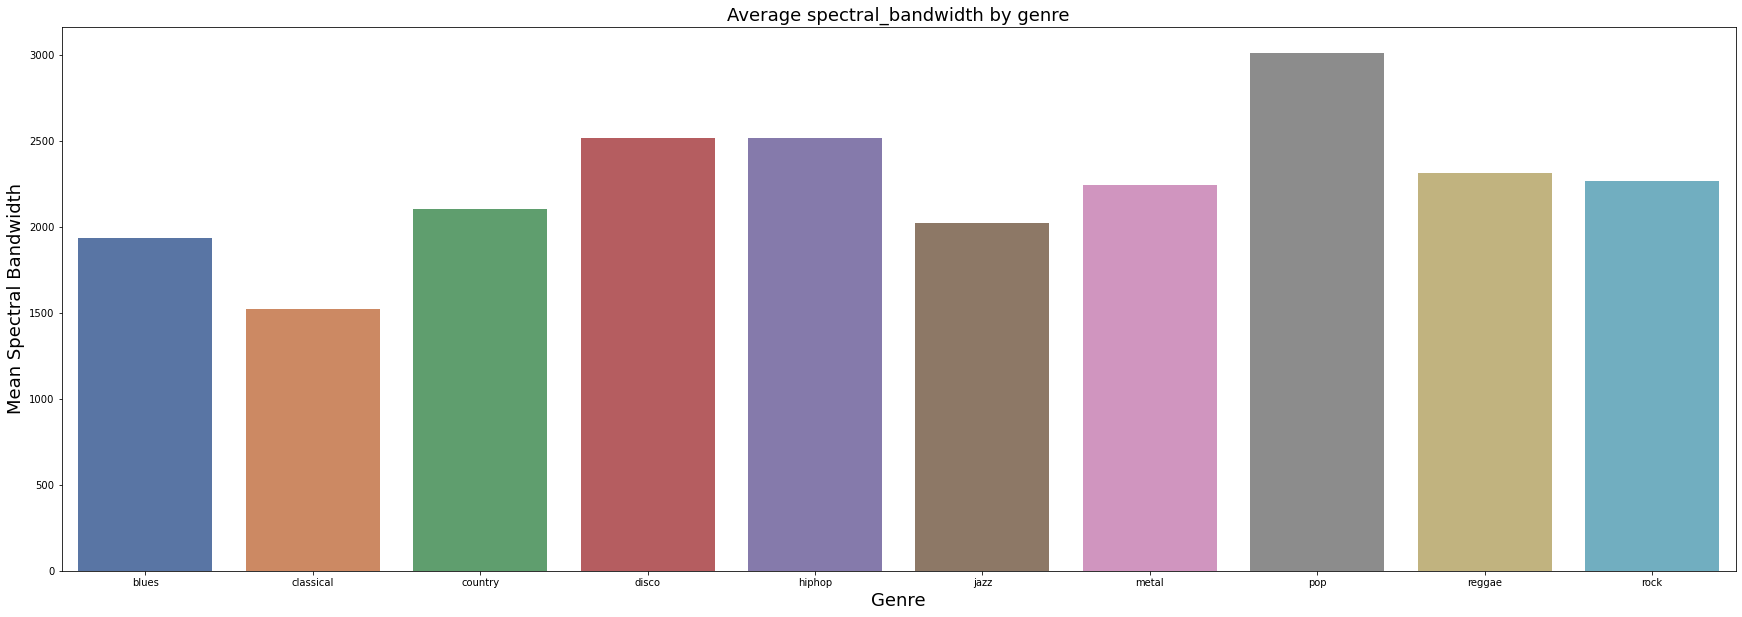

In [13]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

spectral_bandwidths = [ data[data['label']==x].spectral_bandwidth.mean() for x in genres ]

sns.barplot(x=genres, y=spectral_bandwidths, palette="deep")

plt.title("Average spectral_bandwidth by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Spectral Bandwidth', fontsize = 18)

## 3. Rolloff

Rolloff is a term typically used to describe filters. It describes the steepness of the transition from the stop band to the pass band (the stop band includes the blocked frequencies, while the pass band includes the audible frequencies). A higher rolloff might indicate music that has less overtones (peripheral frequencies with lower amplitude), or that sounds more "crisp" and clean.

## Rolloff Distribution

The rolloff distributions looks almost the same as the spectral bandwidth distributions. This very likely indicates a correlation between the two.

Pop, disco, hiphop, and metal have high rolloff. This seems to support my theory about "crisp" sounding music.

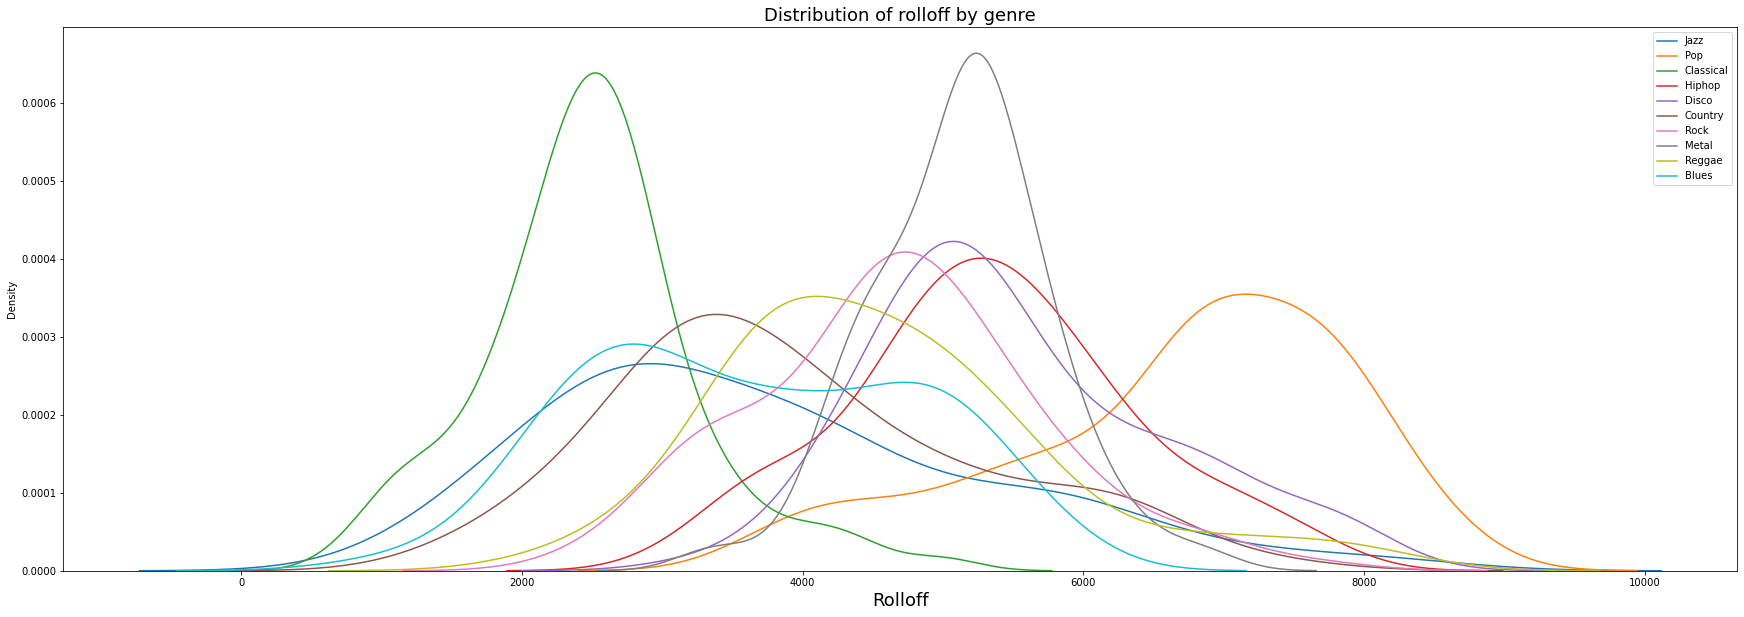

In [14]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'rolloff'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'rolloff'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'rolloff'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'rolloff'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'rolloff'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'rolloff'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'rolloff'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'rolloff'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'rolloff'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'rolloff'], label="Blues")
plt.title("Distribution of rolloff by genre", fontsize = 18)

plt.xlabel("Rolloff", fontsize = 18)

plt.legend()

### Rolloff Means

There is a lot of variance in the means of the rolloff. It also closely resembles the means of the spectral bandwidth.

Text(0, 0.5, 'Rolloff')

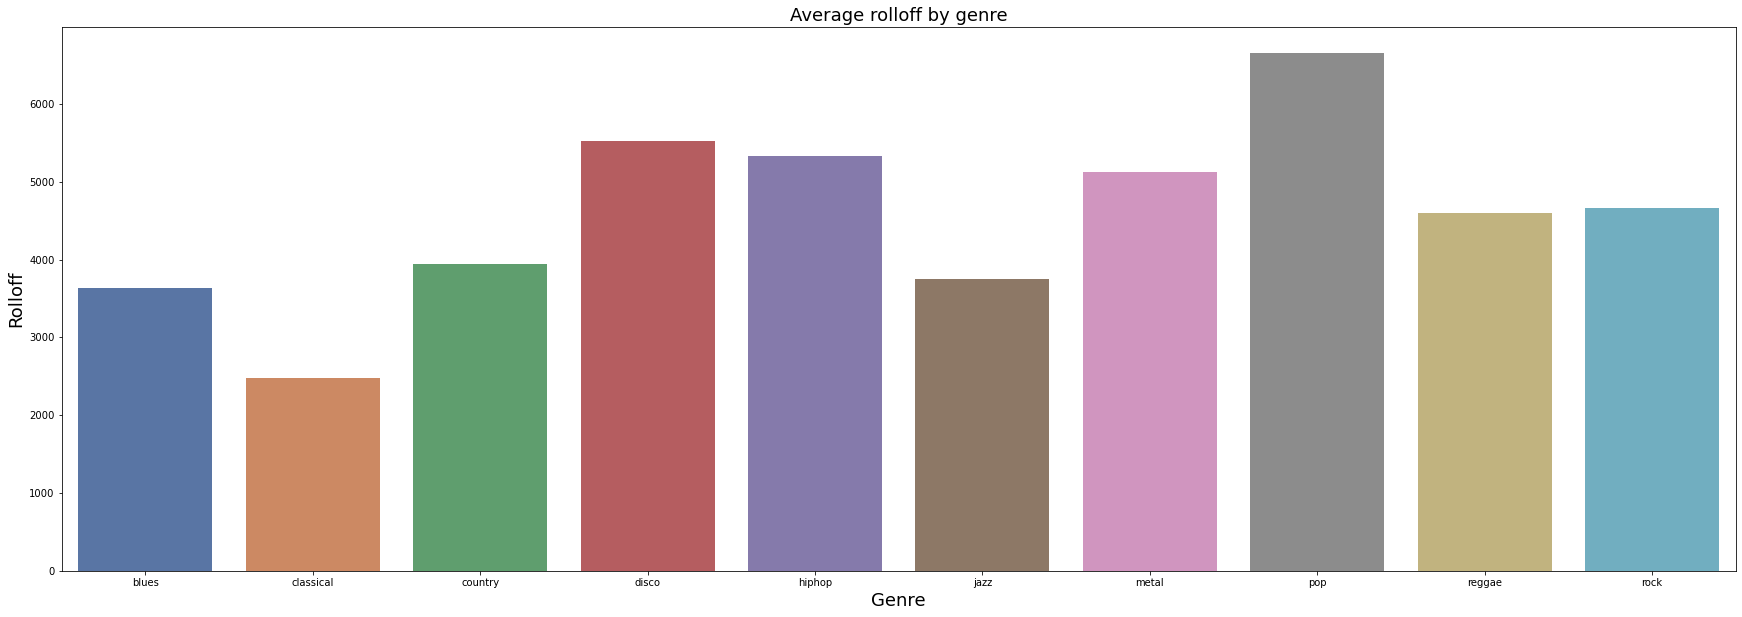

In [15]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

rolloffs = [ data[data['label']==x].rolloff.mean() for x in genres ]

sns.barplot(x=genres, y=rolloffs, palette="deep")

plt.title("Average rolloff by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Rolloff', fontsize = 18)

### Feature Correlations

This heatmap shows the correlations between all of the features. This quantifies how close they are to a perfect linear relationship.`

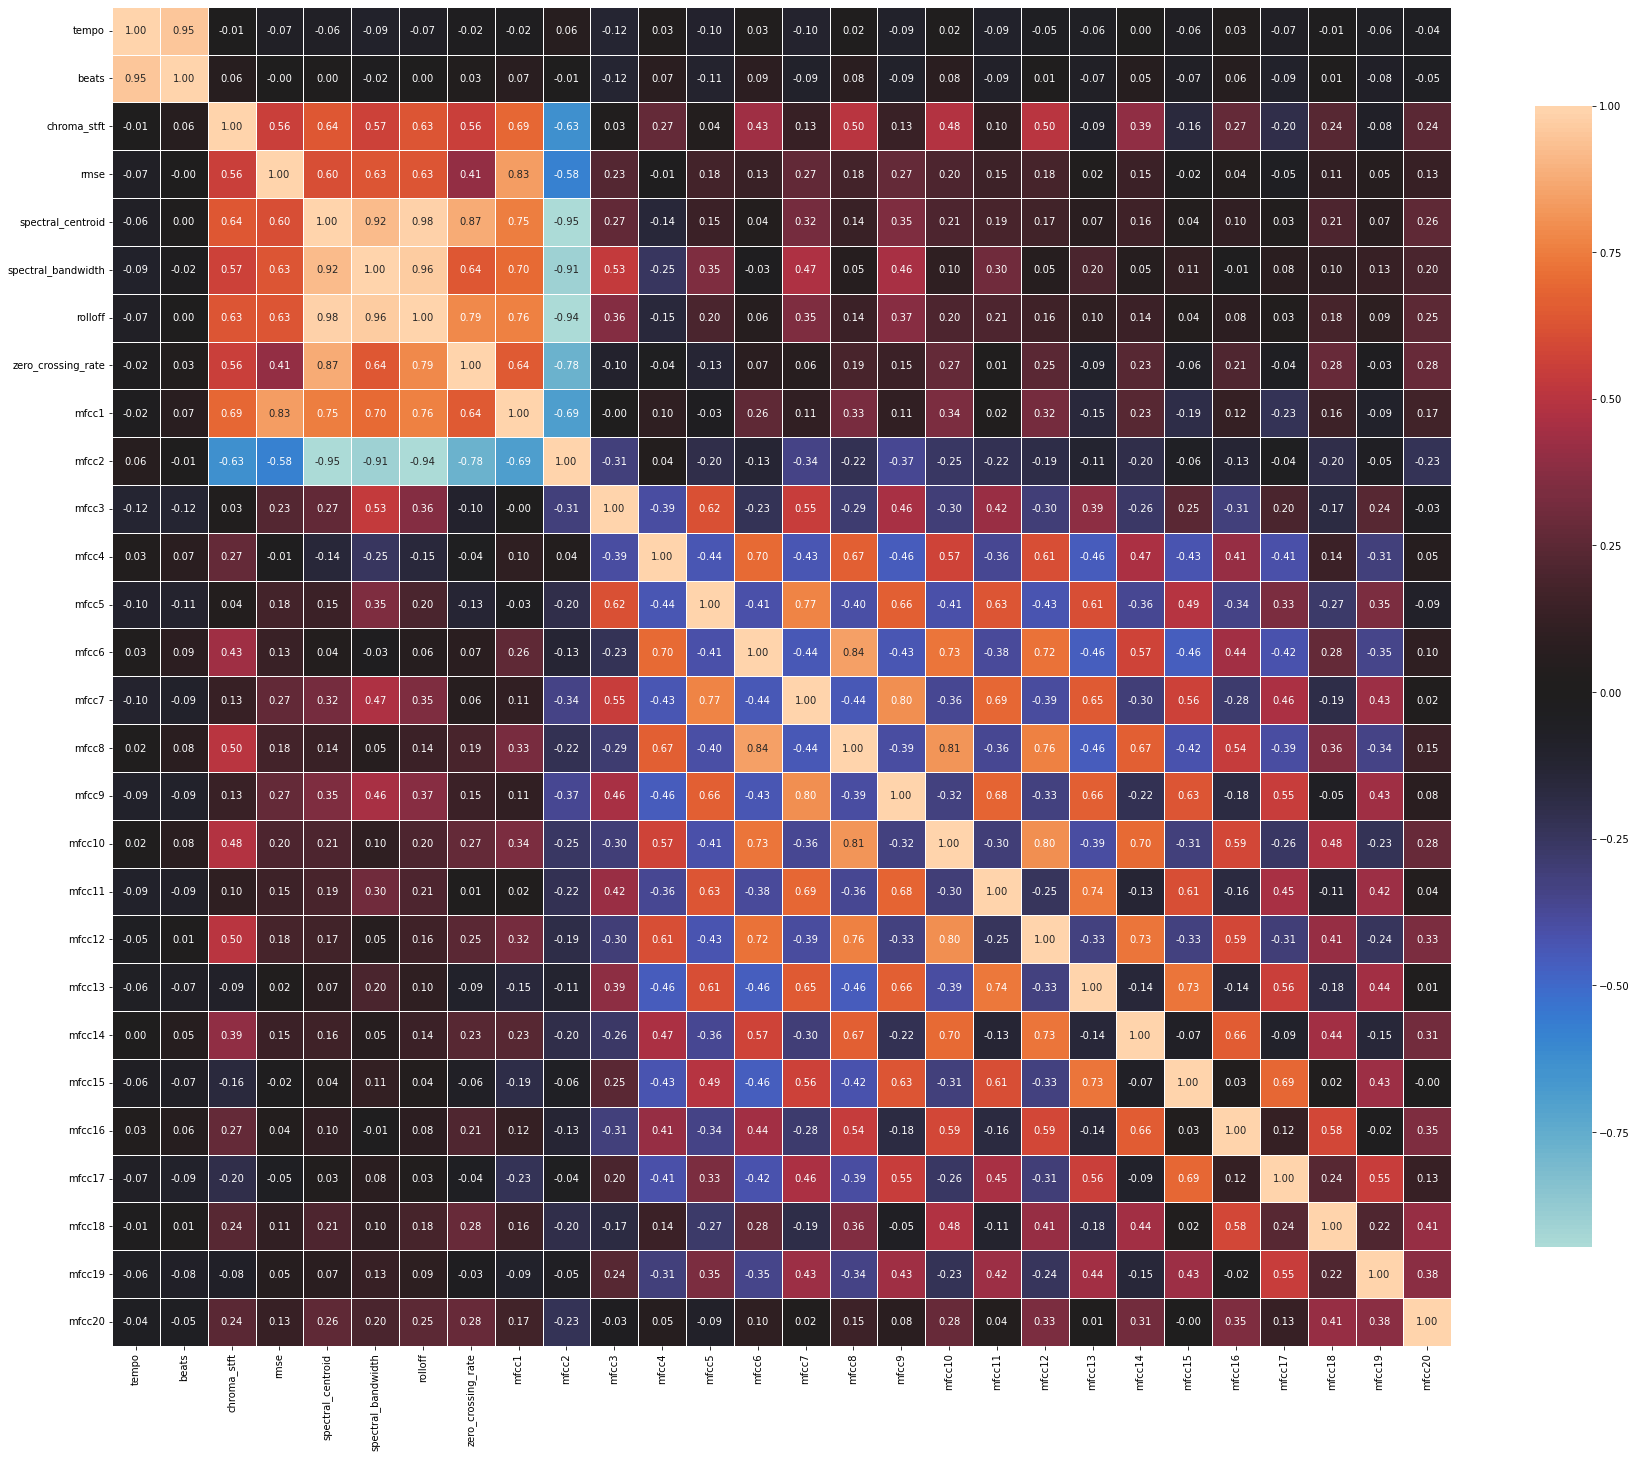

In [16]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

* This filtered list more clearly shows the features with the strongest positive correlations.

* Here we can see that rolloff is strongly correlated with both spectral centroid and spectral bandwidth.

* I am not sure what the difference between tempo and beats is, but there seems to be some minor discrepancy.

* We can also see that there is also a fairly strong correlation between spectral bandwidth and centroid

* I would have expected the correlation between zero crossing rate and spectral centroid to be higher, since they are both dependent on frequency.

In [17]:
c = data.corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[745:-28])

mfcc8               mfcc6                 0.843818
zero_crossing_rate  spectral_centroid     0.874095
spectral_centroid   zero_crossing_rate    0.874095
spectral_bandwidth  spectral_centroid     0.920961
spectral_centroid   spectral_bandwidth    0.920961
beats               tempo                 0.953903
tempo               beats                 0.953903
rolloff             spectral_bandwidth    0.964335
spectral_bandwidth  rolloff               0.964335
spectral_centroid   rolloff               0.982622
rolloff             spectral_centroid     0.982622
dtype: float64


This one shows the features with the strongest negative correlations.

mfcc2 (the second coefficient of the Mel-frequency cepstrum, a mathematical representation of the sound) has a strong negative correlation with centroid, rolloff, and bandwidth.

In [18]:
c = data.corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[:10])

spectral_centroid   mfcc2                -0.946137
mfcc2               spectral_centroid    -0.946137
                    rolloff              -0.940227
rolloff             mfcc2                -0.940227
mfcc2               spectral_bandwidth   -0.906566
spectral_bandwidth  mfcc2                -0.906566
zero_crossing_rate  mfcc2                -0.775487
mfcc2               zero_crossing_rate   -0.775487
mfcc1               mfcc2                -0.689646
mfcc2               mfcc1                -0.689646
dtype: float64


### Scatter Plots

These scatter plots effectively visualize the relationships between the highly correlated variables.

Most notably, we can see that some variables have negative, non-linear relationships with mfcc2. It is hard to say why this is, because my understanding of Mel-frequency cepstrum is fairly weak.

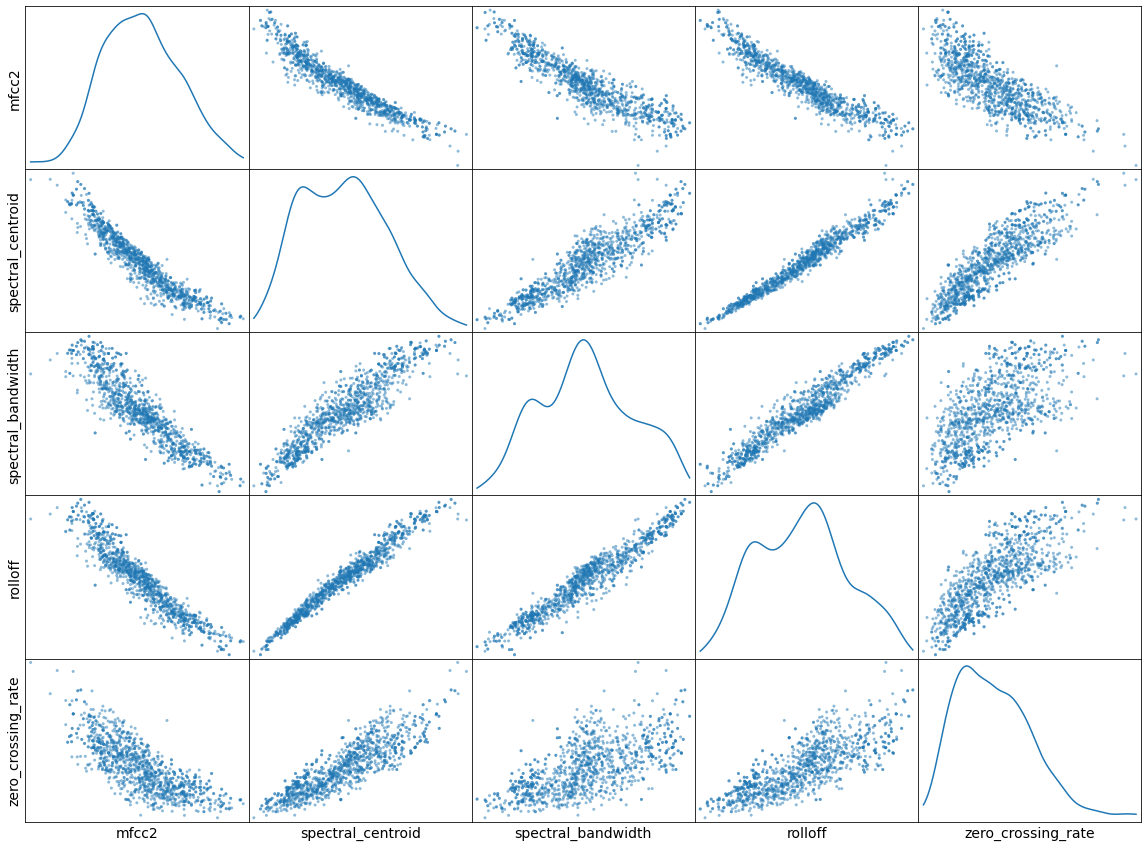

In [19]:
attributes = ["mfcc2", "spectral_centroid",
              "spectral_bandwidth", "rolloff", "zero_crossing_rate" ]
sm = scatter_matrix(data[attributes], figsize=(20, 15), diagonal = "kde");

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize = 14)
    x.set_ylabel(x.get_ylabel(), fontsize = 14)

## Preprocessing and Feature Selection

Since all the data is numerical and we have no NaN values (shown below) preprocessing should be easy.

In [20]:
data.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

First we should train and evaluate a model including all the features, and then one with some features removed to see which method is preferable.

In [21]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV

data = data.drop('filename', axis=1)

X = data.loc[:, data.columns != 'label']
y = data['label']

label_encoder = LabelEncoder().fit(y)
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

rf_params = { 
    'n_estimators': [ i*10 for i in range(15, 30) ],
    'max_features': ['auto'],
    'n_jobs': [-1],
    'random_state': [0]
}

xgb_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1],
    'n_jobs': [-1],
    'random_state': [0]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=k_fold, n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=k_fold, n_jobs=-1)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

rf_params_max = rf_grid.best_params_
xgb_params_max = xgb_grid.best_params_

print("RF accuracy:")
print(rf_grid.score(X_train, y_train))
print("RF params:")
print(rf_params_max)
print("")
print("XGB accuracy:")
print(xgb_grid.score(X_train, y_train))
print("XGB params:")
print(xgb_params_max)
print("")

rf_model = RandomForestClassifier(**rf_params_max)
xgb_model = XGBClassifier(**xgb_params_max)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)


print("RF validation accuracy")
print(accuracy_score(y_test, rf_preds))
print("")
print("Random Forest Classification Report: \n" + classification_report(y_test, rf_preds))
print("")

print("XGB validation accuracy:")
print(accuracy_score(y_test, xgb_preds))
print("")
print("XGB Classification Report: \n" + classification_report(y_test, xgb_preds))
print("")

Now we can drop some of the features to see if it improves the model

As expected, removing the highly correlated features had very little effect.

In [ ]:
# Create models with the parameters found in grid search
rf_model = RandomForestClassifier(**rf_params_max)
xgb_model = XGBClassifier(**xgb_params_max)

X_train = X_train.drop(['rolloff', 'mfcc2', 'beats'], axis=1)
X_test = X_test.drop(['rolloff', 'mfcc2', 'beats'], axis=1)

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=k_fold, n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=k_fold, n_jobs=-1)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

rf_params_max = rf_grid.best_params_
xgb_params_max = xgb_grid.best_params_

print("RF accuracy:")
print(rf_grid.score(X_train, y_train))
print("RF params:")
print(rf_params_max)
print("")
print("XGB accuracy:")
print(xgb_grid.score(X_train, y_train))
print("XGB params:")
print(xgb_params_max)
print("")

rf_model = RandomForestClassifier(**rf_params_max)
xgb_model = XGBClassifier(**xgb_params_max)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

print("RF validation accuracy")
print(accuracy_score(y_test, rf_preds))
print("")
print("Random Forest Classification Report: \n" + classification_report(y_test, rf_preds))
print("")

print("XGB validation accuracy")
print(accuracy_score(y_test, xgb_preds))
print("")
print("XGB Classification Report: \n" + classification_report(y_test, xgb_preds))
print("")

### Model Summary

We were able to classify about 70% of songs correctly in the test set. XGBoost very slightly outperformed the Random Forest model, in most cases by 1-2%. It could be worth trying additional models or feature engineering techniques in the future to see if performance can be improved.